In [13]:
# Lasso regression is a linear regression technique that includes an L1 regularization term, encouraging sparsity
# in the model by penalizing the absolute values of the coefficients. Here''s an example of using Lasso regression 
# with a real-life dataset:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
# Load the California housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

In [5]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Create and train the Lasso regression model
alpha = 0.01  # Regularization strength (adjust as needed)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [10]:
# Make predictions on the test set
y_pred = lasso_model.predict(X_test_scaled)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.5483


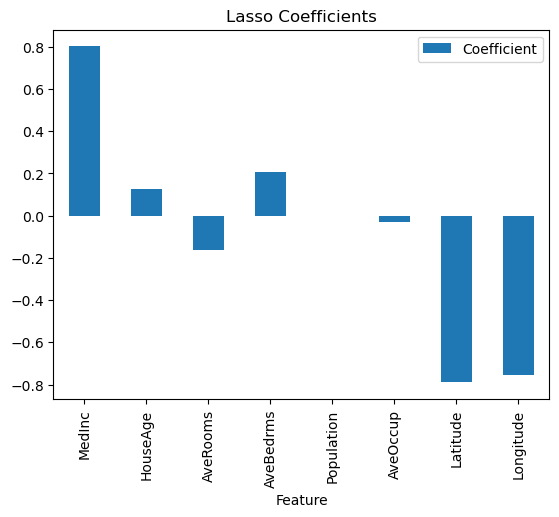

In [12]:
# Visualize the coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
coef_df.plot(kind='bar', x='Feature', y='Coefficient', title='Lasso Coefficients')
plt.show()

In [15]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.5816154300698727


In [17]:
# Calculate adjusted R^2
n = len(y_test)
k = X.shape[1]
adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
print(f'Adjusted R^2: {adjusted_r2:.4f}')

Adjusted R^2: 0.5808
